In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
csv_file_path = './data/data.csv'
df = pd.read_csv(csv_file_path)
print(df)

        Lens      WD    FOV          f
0  CFZA 16mm  148.92  87.64  12.013514
1   Sensor H  128.00  76.70  11.798696
2       7.07   86.00  54.48  11.160426
3        NaN  101.00  62.15  11.489461


In [3]:
print(df.WD)

0    148.92
1    128.00
2     86.00
3    101.00
Name: WD, dtype: float64


In [4]:
print(df.f)

0    12.013514
1    11.798696
2    11.160426
3    11.489461
Name: f, dtype: float64


Text(0, 0.5, 'f (calculated)')

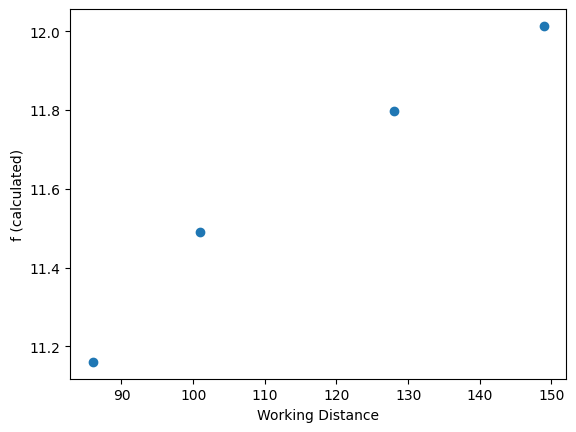

In [5]:
plt.scatter(df.WD, df.f, label="First Four Points")
plt.xlabel("Working Distance")
plt.ylabel("f (calculated)")

2050.759227304637
[ 7.30422344e+13  2.27340522e+05 -7.30422571e+13]


Text(0, 0.5, 'WD')

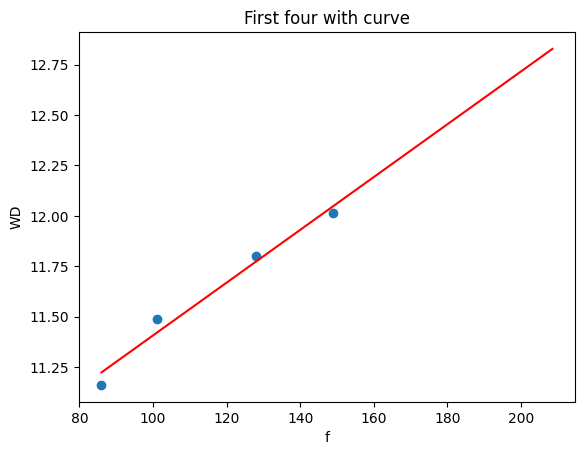

In [7]:
import numpy as np
import scipy.optimize as sp_optimize

# VV sample function provided by will VV
initial_guess = [1.0, 0.01, 1.0]
def sample_function(WD, A, B, C):
    return A*np.exp(-B * WD) + C

my_params, my_covariance = sp_optimize.curve_fit(sample_function, df["WD"], df["f"], p0=initial_guess, maxfev=10000)

print(my_params[0])
print(my_covariance[0])

WD_fit = np.linspace(df["WD"].min(), df["WD"].max() * 1.4, 100)
f_fit = sample_function(WD_fit, *my_params)

plt.scatter(df["WD"], df["f"], label='Original Data')

plt.plot(WD_fit, f_fit, label='Fitted Curve', color='red')
plt.title("First four with curve")
plt.xlabel("f")
plt.ylabel("WD")
